<a href="https://colab.research.google.com/github/danielgraviet/CS-180-Data-Science/blob/main/04_wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/rhodes-byu/cs180-winter25/blob/main/labs/04-wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# BYU CS 180 Lab 4: Data Wrangling

## Introduction:
In this lab, we will analyze college football data from the years 2016-2020. The data is spread across multiple files and will require a bit of “data wrangling”.

Once we have cleaned and processed the data, we will put our statistics knowledge to good use by digging a little deeper than simple summary statistics.

Very rarely are data scientists handed a pristine data set ready for analysis. More often than not, quite a bit of work is required to clean and preprocess the data so that it's ready for analysis.

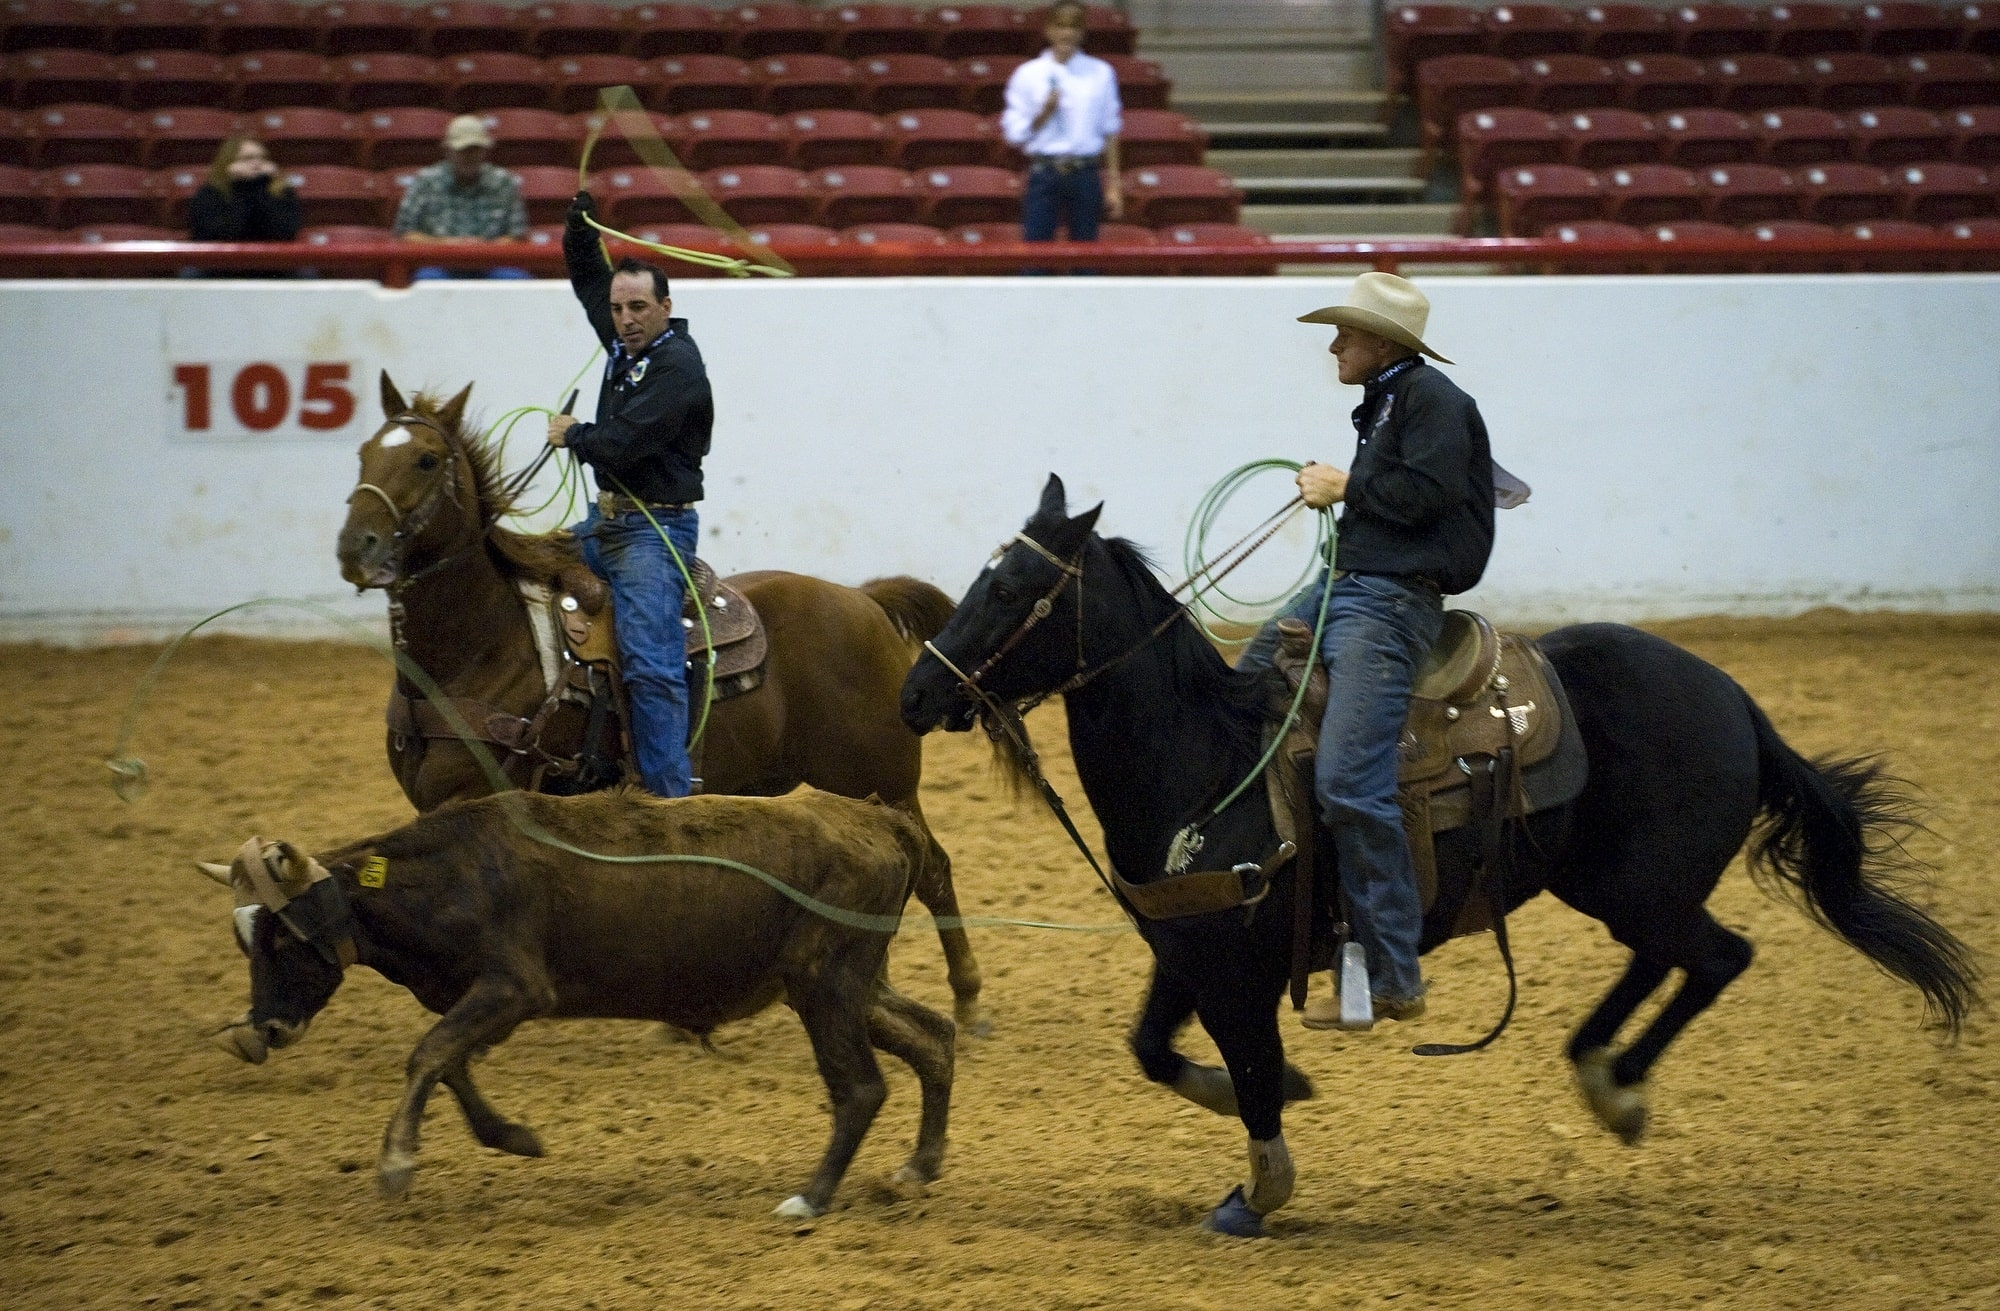

**Data wrangling**, also called **data cleaning**, **data remediation**, or **data munging**, refers to a variety of processes designed to transform raw data into more readily usable formats. The exact methods differ from project to project depending on the data you’re leveraging and the goal you’re trying to achieve.

Some examples of data wrangling include:

- Merging multiple data sources into a single dataset for analysis.

- Identifying gaps in data (for example, empty cells in a spreadsheet) and either filling or deleting them.

- Deleting data that’s either unnecessary or irrelevant to the project you’re working on.

- Identifying extreme outliers in data and either explaining the discrepancies or removing them.

#### Measures of Variability
We are very used to comparing point estimates. For example, in order to tell if one thing is better than the other, we may look at the average of each over time. Consider the following plot comparing the average of two groups, mu_0 and mu_1.

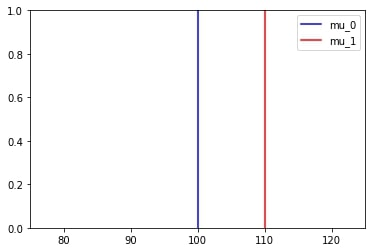

In this case, we might conclude that mu_1 is greater because it’s average is higher. However, we are ignoring an important aspect of the data: its variability.

When we plot the **variability and the mean**, we observe the following plot:

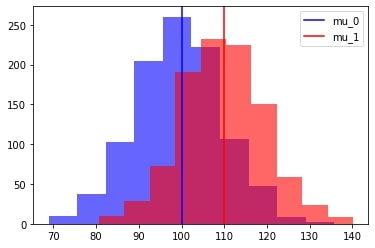

Now the distributions of mu_1 and mu_0 are so close that it’s difficult to say with certainty that mu_1 is better. For any random draw of mu_1, it’s roughly a 50-50 chance to actually be greater than a random draw of mu_0.

Now suppose we observe the following plot:

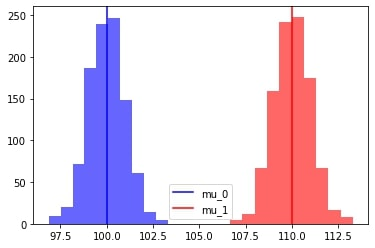

While the means are the same as before, the variability of the two distributions are now very different. We can say with a high degree of certainty that mu_1 is higher.

Keep this idea in mind as you analyze the dataset for this lab.

### **Data:**
Data from the 2016, 2017, 2018, 2019, and 2020 college football seasons are also available on the course GitHub:

In [ ]:
# Download the data located at the following URLs
cfb16_url = "https://raw.githubusercontent.com/rhodes-byu/cs180-winter25/refs/heads/main/labs/data/cfb16.csv"
cfb17_url = "https://raw.githubusercontent.com/rhodes-byu/cs180-winter25/refs/heads/main/labs/data/cfb17.csv"
cfb18_url = "https://raw.githubusercontent.com/rhodes-byu/cs180-winter25/refs/heads/main/labs/data/cfb18.csv"
cfb19_url = "https://raw.githubusercontent.com/rhodes-byu/cs180-winter25/refs/heads/main/labs/data/cfb19.csv"
cfb20_url = "https://raw.githubusercontent.com/rhodes-byu/cs180-winter25/refs/heads/main/labs/data/cfb20.csv"

## Exercise 1: Yearly Counts

### Exercise Question
Read in the files, and add a year column to each file (from the original .csv file name).

In [ ]:
# imports
import pandas as pd

# Write your code to read in the files and add the year values from each csv:
urls = {
    2016: "https://raw.githubusercontent.com/rhodes-byu/cs180-winter25/refs/heads/main/labs/data/cfb16.csv",
    2017 : "https://raw.githubusercontent.com/rhodes-byu/cs180-winter25/refs/heads/main/labs/data/cfb17.csv",
    2018 : "https://raw.githubusercontent.com/rhodes-byu/cs180-winter25/refs/heads/main/labs/data/cfb18.csv",
    2019 :"https://raw.githubusercontent.com/rhodes-byu/cs180-winter25/refs/heads/main/labs/data/cfb19.csv",
    2020 : "https://raw.githubusercontent.com/rhodes-byu/cs180-winter25/refs/heads/main/labs/data/cfb20.csv",
}

dataframes = []
for year, url in urls.items():
  temp_df = pd.read_csv(url)
  temp_df['Year'] = year
  dataframes.append(temp_df)


                         Team  Games  Win  Loss  Off.Rank  Off.Plays  \
0                 Akron (MAC)     12    5     7        84        776   
1               Alabama (SEC)     15   14     1        34       1056   
2  Appalachian St. (Sun Belt)     13   10     3        52        912   
3            Arizona (Pac-12)     12    3     9        67        815   
4        Arizona St. (Pac-12)     12    5     7        81        900   

   Off.Yards  Off.Yards.Play  Off.TDs  Off.Yards.per.Game  ...  Turnover.Rank  \
0       4649            5.99       38               387.4  ...            114   
1       6829            6.47       59               455.3  ...             17   
2       5589            6.13       45               429.9  ...             18   
3       4957            6.08       39               413.1  ...            112   
4       4689            5.21       43               390.8  ...             93   

   Fumbles.Recovered  Opponents.Intercepted  Turnovers.Gain  Fumbles.Lost  \
0  

## Exercise 2: Data Aggregation

### Exercise Question
Combine every file into a single dataframe.

In [ ]:
college_football_df = pd.concat(dataframes, ignore_index=True)
print(college_football_df.head())

                         Team  Games  Win  Loss  Off.Rank  Off.Plays  \
0                 Akron (MAC)     12    5     7        84        776   
1               Alabama (SEC)     15   14     1        34       1056   
2  Appalachian St. (Sun Belt)     13   10     3        52        912   
3            Arizona (Pac-12)     12    3     9        67        815   
4        Arizona St. (Pac-12)     12    5     7        81        900   

   Off.Yards  Off.Yards.Play  Off.TDs  Off.Yards.per.Game  ...  Turnover.Rank  \
0       4649            5.99       38               387.4  ...            114   
1       6829            6.47       59               455.3  ...             17   
2       5589            6.13       45               429.9  ...             18   
3       4957            6.08       39               413.1  ...            112   
4       4689            5.21       43               390.8  ...             93   

   Fumbles.Recovered  Opponents.Intercepted  Turnovers.Gain  Fumbles.Lost  \
0  

## Exercise 3: Conference Search

### Exercise Question
Create a `conference` field by parsing the `team` column.



Example:

| Team | Conference |
| --- | --- |
| Penn State University (Big Ten) | Big Ten |

In [ ]:
# Write your code to parse the conference from the team name:
college_football_df['Conference'] = college_football_df['Team'].str.extract(r'\(([^)]+)\)')

## Exercise 4: Big Ten Vs. South Eastern

### Exercise Question 4a: Offense
- Is there a statistical difference between the Big Ten Conference and the South Eastern Conference in terms of `Off.Yards.per.Game`? Use a [seaborn KDE]("https://seaborn.pydata.org/generated/seaborn.kdeplot.html") plot to create a figure. Comment on the difference in means and the overlap of distributions.

- Do the same as above for `Off.TDs`.

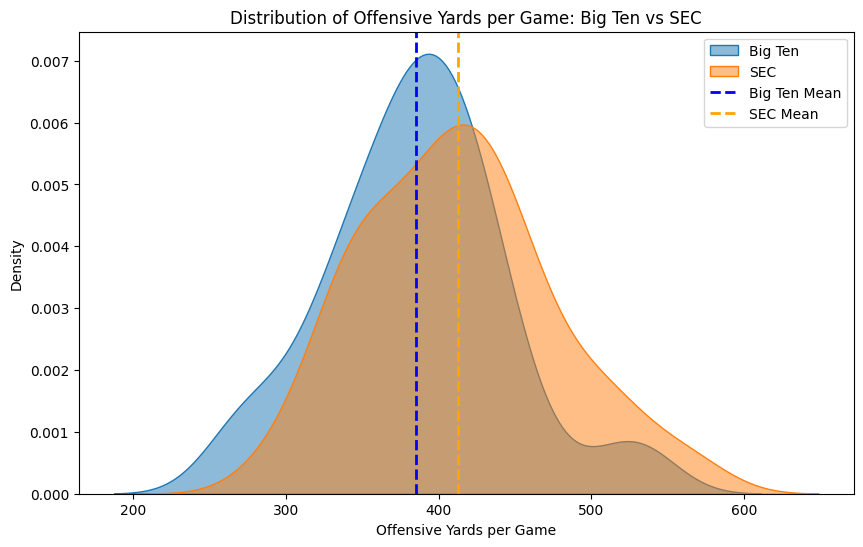

=== Off.Yards.per.Game ===
Big Ten Mean: 385.56
SEC Mean: 412.79
Difference: 27.22
t-statistic = -2.658, p-value = 0.0088

Conclusion: There IS a statistically significant difference (p < 0.05)


In [ ]:
# Write the code for the statistical differences for Off.Yards.per.Game:
import seaborn
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

big_ten = college_football_df[college_football_df['Conference'] == 'Big Ten']
sec = college_football_df[college_football_df['Conference'] == 'SEC']

plt.figure(figsize=(10, 6))
seaborn.kdeplot(data=big_ten, x='Off.Yards.per.Game', label='Big Ten',
            fill=True, alpha=0.5)
seaborn.kdeplot(data=sec, x='Off.Yards.per.Game', label='SEC',
            fill=True, alpha=0.5)
plt.axvline(big_ten['Off.Yards.per.Game'].mean(),
            color='blue', linestyle='--', linewidth=2, label='Big Ten Mean')
plt.axvline(sec['Off.Yards.per.Game'].mean(),
            color='orange', linestyle='--', linewidth=2, label='SEC Mean')
plt.title('Distribution of Offensive Yards per Game: Big Ten vs SEC')
plt.xlabel('Offensive Yards per Game')
plt.legend()
plt.show()

print("=== Off.Yards.per.Game ===")
print(f"Big Ten Mean: {big_ten['Off.Yards.per.Game'].mean():.2f}")
print(f"SEC Mean: {sec['Off.Yards.per.Game'].mean():.2f}")
print(f"Difference: {abs(big_ten['Off.Yards.per.Game'].mean() - sec['Off.Yards.per.Game'].mean()):.2f}")

t_stat, p_val = stats.ttest_ind(big_ten['Off.Yards.per.Game'],
                                 sec['Off.Yards.per.Game'])
print(f"t-statistic = {t_stat:.3f}, p-value = {p_val:.4f}")

if p_val < 0.05:
    print("\nConclusion: There IS a statistically significant difference (p < 0.05)")
else:
    print("\nConclusion: There is NO statistically significant difference (p ≥ 0.05)")

(Comment on the difference in means and the overlap of distributions here)

- SEC teams average more offensive yards per game than Big Ten teams
- The mean lines show SEC is shifted to the right (higher yards)
- The distributions overlap a lot. Many teams from both conferences perform similarly
- The difference exists but isn't huge - there's a lot of mixing between the two groups
- p-value < 0.05, so the difference is real, but the overlap shows it's not a massive gap

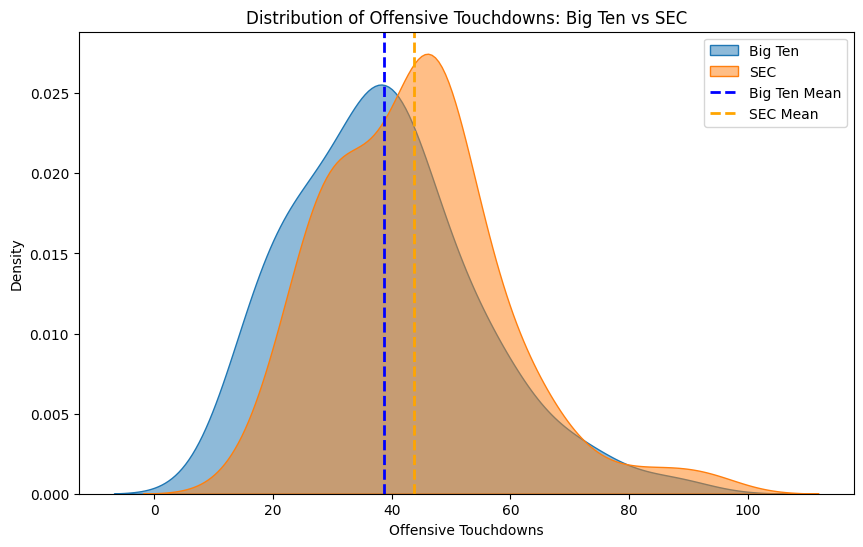

=== Off.TDs.per.Game ===
Big Ten Mean: 38.64
SEC Mean: 43.77
Difference: 5.13
t-statistic = -2.015, p-value = 0.0458

Conclusion: There IS a statistically significant difference (p < 0.05)


In [ ]:
# Write the code for the statistical differences for Off.TDs:
plt.figure(figsize=(10, 6))
seaborn.kdeplot(data=big_ten, x='Off.TDs', label='Big Ten',
            fill=True, alpha=0.5)
seaborn.kdeplot(data=sec, x='Off.TDs', label='SEC',
            fill=True, alpha=0.5)
plt.axvline(big_ten['Off.TDs'].mean(),
            color='blue', linestyle='--', linewidth=2, label='Big Ten Mean')
plt.axvline(sec['Off.TDs'].mean(),
            color='orange', linestyle='--', linewidth=2, label='SEC Mean')
plt.title('Distribution of Offensive Touchdowns: Big Ten vs SEC')
plt.xlabel('Offensive Touchdowns')
plt.legend()
plt.show()

print("=== Off.TDs ===")
print(f"Big Ten Mean: {big_ten['Off.TDs'].mean():.2f}")
print(f"SEC Mean: {sec['Off.TDs'].mean():.2f}")
print(f"Difference: {abs(big_ten['Off.TDs'].mean() - sec['Off.TDs'].mean()):.2f}")

t_stat, p_val = stats.ttest_ind(big_ten['Off.TDs'],
                                 sec['Off.TDs'])
print(f"t-statistic = {t_stat:.3f}, p-value = {p_val:.4f}")

if p_val < 0.05:
    print("\nConclusion: There IS a statistically significant difference (p < 0.05)")
else:
    print("\nConclusion: There is NO statistically significant difference (p ≥ 0.05)")


(Comment on the difference in means and the overlap of distributions here)

- SEC teams average about 5 more touchdowns than Big Ten teams (44 vs 39)
- The mean lines show SEC is shifted right, indicating higher TD production
- Check how much the distributions overlap - lots of overlap means similar performance
- A 5 TD difference over a season is noticeable but not enormous
- p-value < 0.05, the difference is statistically real, but overlap shows how much the conferences mix

### Exercise Question 4b: Defense
- Is there a statistical difference between the Big Ten Conference and the South Eastern Conference in terms  of `Points.Allowed`? Use a  [seaborn KDE]("https://seaborn.pydata.org/generated/seaborn.kdeplot.html") plot to create a figure.  Comment on the difference in means and the overlap of distributions.

- Do the same as above for `Opp.Pass.Yds.Allowed` and `Opp.Rush.Yards.Allowed`.



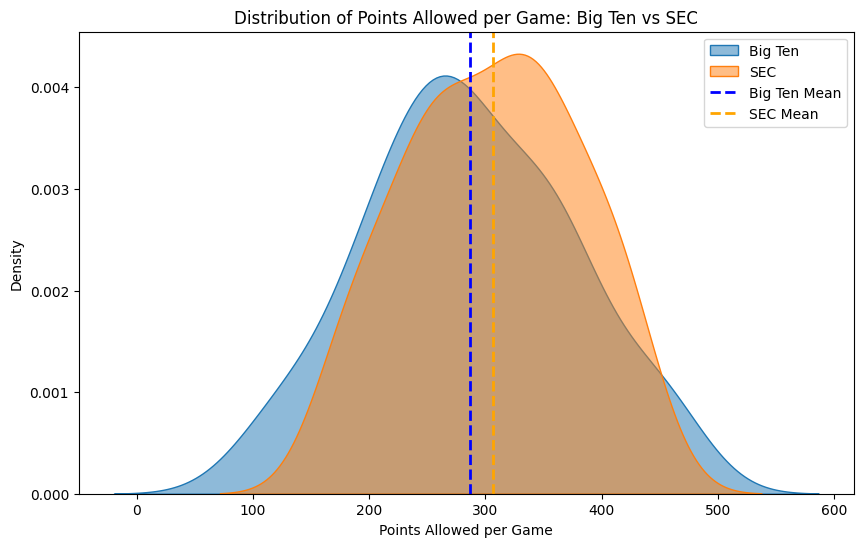

=== Points.Allowed ===
Big Ten Mean: 286.33
SEC Mean: 306.13
Difference: 19.80
t-statistic = -1.431, p-value = 0.1548

Conclusion: There is NO statistically significant difference (p ≥ 0.05)


In [ ]:
# Write the code for the statistical differences for Points.Allowed:
plt.figure(figsize=(10, 6))
seaborn.kdeplot(data=big_ten, x='Points.Allowed', label='Big Ten',
            fill=True, alpha=0.5)
seaborn.kdeplot(data=sec, x='Points.Allowed', label='SEC',
            fill=True, alpha=0.5)
plt.axvline(big_ten['Points.Allowed'].mean(),
            color='blue', linestyle='--', linewidth=2, label='Big Ten Mean')
plt.axvline(sec['Points.Allowed'].mean(),
            color='orange', linestyle='--', linewidth=2, label='SEC Mean')
plt.title('Distribution of Points Allowed per Game: Big Ten vs SEC')
plt.xlabel('Points Allowed per Game')
plt.legend()
plt.show()

print("=== Points.Allowed ===")
print(f"Big Ten Mean: {big_ten['Points.Allowed'].mean():.2f}")
print(f"SEC Mean: {sec['Points.Allowed'].mean():.2f}")
print(f"Difference: {abs(big_ten['Points.Allowed'].mean() - sec['Points.Allowed'].mean()):.2f}")

t_stat, p_val = stats.ttest_ind(big_ten['Points.Allowed'],
                                 sec['Points.Allowed'])
print(f"t-statistic = {t_stat:.3f}, p-value = {p_val:.4f}")

if p_val < 0.05:
    print("\nConclusion: There IS a statistically significant difference (p < 0.05)")
else:
    print("\nConclusion: There is NO statistically significant difference (p ≥ 0.05)")


(Comment on the difference in means and the overlap of distributions here)

- Big Ten teams allow about 20 fewer points than SEC teams (286 vs 306)
- Lower is better for defense, so Big Ten has slightly better defense on average
- The p-value is 0.15 (above 0.05), so the difference is NOT statistically significant
- The distributions likely overlap a lot, meaning many teams from both conferences allow similar points
- While Big Ten appears better defensively, the difference could just be random chance

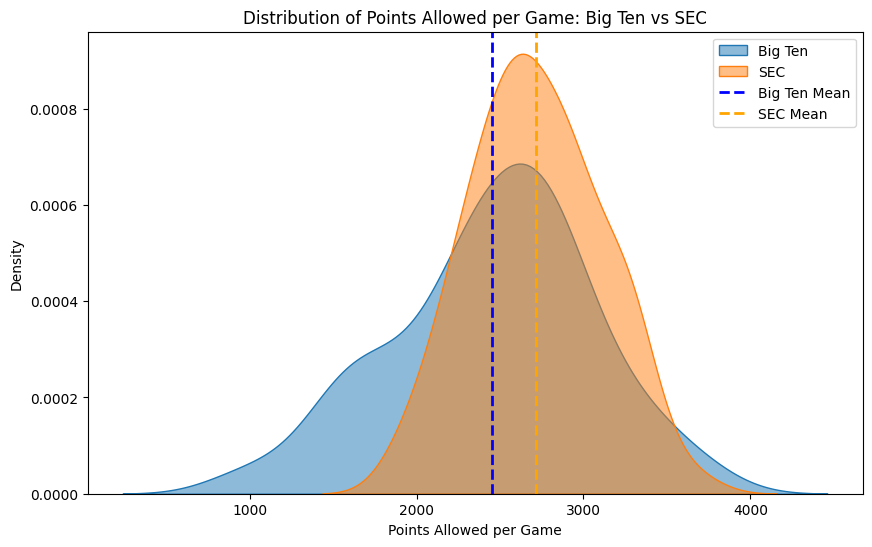

=== Opp.Pass.Yds.Allowed ===
Big Ten Mean: 2454.86
SEC Mean: 2716.30
Difference: 261.44
t-statistic = -3.095, p-value = 0.0024

Conclusion: There IS a statistically significant difference (p < 0.05)


In [ ]:
# Write the code for the statistical differences for Opp.Pass.Yds.Allowed:
plt.figure(figsize=(10, 6))
seaborn.kdeplot(data=big_ten, x='Opp.Pass.Yds.Allowed', label='Big Ten',
            fill=True, alpha=0.5)
seaborn.kdeplot(data=sec, x='Opp.Pass.Yds.Allowed', label='SEC',
            fill=True, alpha=0.5)
plt.axvline(big_ten['Opp.Pass.Yds.Allowed'].mean(),
            color='blue', linestyle='--', linewidth=2, label='Big Ten Mean')
plt.axvline(sec['Opp.Pass.Yds.Allowed'].mean(),
            color='orange', linestyle='--', linewidth=2, label='SEC Mean')
plt.title('Distribution of Points Allowed per Game: Big Ten vs SEC')
plt.xlabel('Points Allowed per Game')
plt.legend()
plt.show()

print("=== Opp.Pass.Yds.Allowed ===")
print(f"Big Ten Mean: {big_ten['Opp.Pass.Yds.Allowed'].mean():.2f}")
print(f"SEC Mean: {sec['Opp.Pass.Yds.Allowed'].mean():.2f}")
print(f"Difference: {abs(big_ten['Opp.Pass.Yds.Allowed'].mean() - sec['Opp.Pass.Yds.Allowed'].mean()):.2f}")

t_stat, p_val = stats.ttest_ind(big_ten['Opp.Pass.Yds.Allowed'],
                                 sec['Opp.Pass.Yds.Allowed'])
print(f"t-statistic = {t_stat:.3f}, p-value = {p_val:.4f}")

if p_val < 0.05:
    print("\nConclusion: There IS a statistically significant difference (p < 0.05)")
else:
    print("\nConclusion: There is NO statistically significant difference (p ≥ 0.05)")



(Comment on the difference in means and the overlap of distributions here)

- Big Ten teams allow about 261 fewer passing yards than SEC teams (2455 vs 2716)
- Lower is better for pass defense, so Big Ten has significantly better pass defense
- The p-value is 0.0024 (well below 0.05), so the difference IS statistically significant
- Big Ten's pass defense is notably stronger - this is a real difference, not random chance
- There's likely less overlap in the distributions compared to other stats we've seen

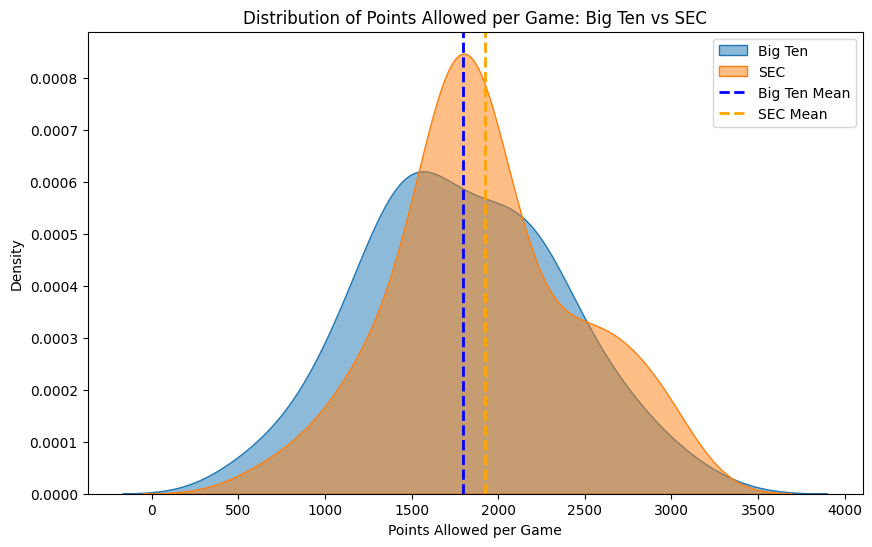

=== Opp.Rush.Yards.Allowed ===
Big Ten Mean: 1794.06
SEC Mean: 1920.97
Difference: 126.91
t-statistic = -1.366, p-value = 0.1741

Conclusion: There is NO statistically significant difference (p ≥ 0.05)


In [ ]:
# Write the code for the statistical differences for Opp.Rush.Yards.Allowed:
plt.figure(figsize=(10, 6))
seaborn.kdeplot(data=big_ten, x='Opp.Rush.Yards.Allowed', label='Big Ten',
            fill=True, alpha=0.5)
seaborn.kdeplot(data=sec, x='Opp.Rush.Yards.Allowed', label='SEC',
            fill=True, alpha=0.5)
plt.axvline(big_ten['Opp.Rush.Yards.Allowed'].mean(),
            color='blue', linestyle='--', linewidth=2, label='Big Ten Mean')
plt.axvline(sec['Opp.Rush.Yards.Allowed'].mean(),
            color='orange', linestyle='--', linewidth=2, label='SEC Mean')
plt.title('Distribution of Points Allowed per Game: Big Ten vs SEC')
plt.xlabel('Points Allowed per Game')
plt.legend()
plt.show()

print("=== Opp.Rush.Yards.Allowed ===")
print(f"Big Ten Mean: {big_ten['Opp.Rush.Yards.Allowed'].mean():.2f}")
print(f"SEC Mean: {sec['Opp.Rush.Yards.Allowed'].mean():.2f}")
print(f"Difference: {abs(big_ten['Opp.Rush.Yards.Allowed'].mean() - sec['Opp.Rush.Yards.Allowed'].mean()):.2f}")

t_stat, p_val = stats.ttest_ind(big_ten['Opp.Rush.Yards.Allowed'],
                                 sec['Opp.Rush.Yards.Allowed'])
print(f"t-statistic = {t_stat:.3f}, p-value = {p_val:.4f}")

if p_val < 0.05:
    print("\nConclusion: There IS a statistically significant difference (p < 0.05)")
else:
    print("\nConclusion: There is NO statistically significant difference (p ≥ 0.05)")




(Comment on the difference in means and the overlap of distributions here)

- Big Ten teams allow about 127 fewer rushing yards than SEC teams (1794 vs 1921)
- Lower is better for run defense, so Big Ten appears slightly better against the run
- The p-value is 0.17 (above 0.05), so the difference is NOT statistically significant
- The distributions likely overlap substantially, meaning both conferences have similar run defenses
- While Big Ten allows fewer rush yards, the difference could just be random variation

## Exercise 5: Offense Statistics

### Exercise Question 5a: Offense
Is the offense changing over time? Create some plots showing the average offensive production over time (each year). Include an estimate of the variability in your figures.

Comment on whether any trends you see are likely to be true or spurious.

Create a plot for the following metrics:
- `Off.Yards.per.Game`
- `Off.TDs`

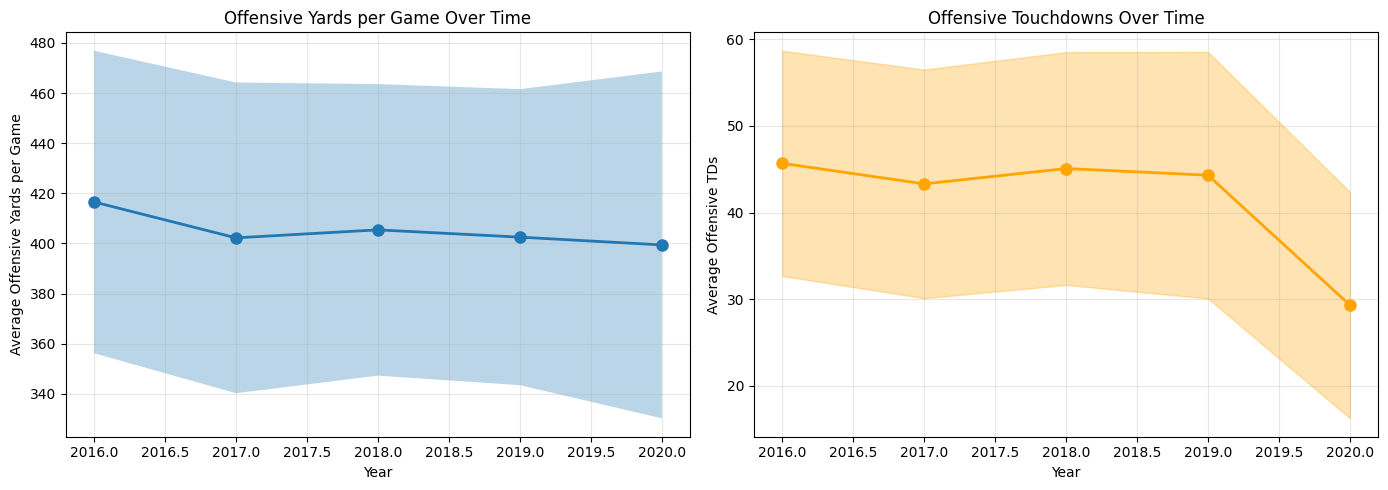

   Year  Yards_mean  Yards_std   TDs_mean    TDs_std
0  2016  416.558621  60.311291  45.681034  12.992037
1  2017  402.250388  61.949764  43.310078  13.189602
2  2018  405.440310  58.126804  45.077519  13.431896
3  2019  402.530769  59.017147  44.307692  14.224036
4  2020  399.435433  69.152887  29.314961  13.060118


In [ ]:
yearly_stats = college_football_df.groupby('Year').agg({
    'Off.Yards.per.Game': ['mean', 'std'],
    'Off.TDs': ['mean', 'std']
}).reset_index()

yearly_stats.columns = ['Year', 'Yards_mean', 'Yards_std', 'TDs_mean', 'TDs_std']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(yearly_stats['Year'], yearly_stats['Yards_mean'], marker='o', linewidth=2, markersize=8)
axes[0].fill_between(yearly_stats['Year'],
                      yearly_stats['Yards_mean'] - yearly_stats['Yards_std'],
                      yearly_stats['Yards_mean'] + yearly_stats['Yards_std'],
                      alpha=0.3)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Average Offensive Yards per Game')
axes[0].set_title('Offensive Yards per Game Over Time')
axes[0].grid(True, alpha=0.3)

axes[1].plot(yearly_stats['Year'], yearly_stats['TDs_mean'], marker='o', linewidth=2, markersize=8, color='orange')
axes[1].fill_between(yearly_stats['Year'],
                      yearly_stats['TDs_mean'] - yearly_stats['TDs_std'],
                      yearly_stats['TDs_mean'] + yearly_stats['TDs_std'],
                      alpha=0.3, color='orange')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Average Offensive TDs')
axes[1].set_title('Offensive Touchdowns Over Time')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(yearly_stats)

### Trends Analysis:

- Offense stayed pretty much the same from 2016-2019 (small ups and downs, nothing big)
- 2020 had a huge drop in TDs (46 to 29). Maybe Covid?
- Yards per game also dropped a bit each year but not by much (417 to 403)
- The year-to-year changes are small compared to how much teams vary within each year
- **Bottom line**: No real trend. offense is basically flat. The 2020 drop is just COVID, not a real change in how teams play

### Exercise Question 5b: Defense
Is the defense changing over time? Create some plots showing the average defensive production over time (each year). Include an estimate of the variability in your figures.

Comment on whether any trends you see are likely to be true or spurious.

Create a plot for the following metrics:
- `Points.Allowed`
- `Opp.Pass.Yds.Allowed`
- `Opp.Rush.Yards.Allowed`

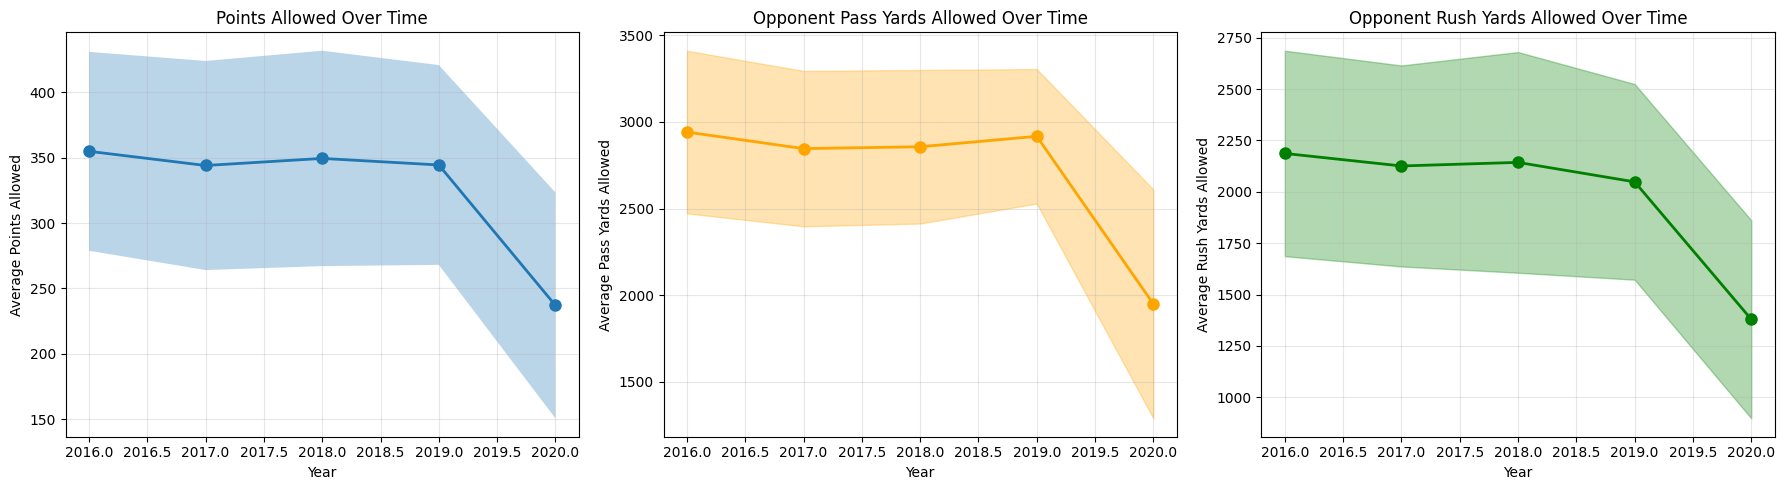

   Year  Points_mean  Points_std    Pass_mean    Pass_std    Rush_mean  \
0  2016   354.818966   76.005217  2941.612069  469.792605  2186.801724   
1  2017   343.976744   79.907707  2845.961240  448.807820  2125.868217   
2  2018   349.387597   82.311936  2856.658915  443.457571  2143.255814   
3  2019   344.384615   76.350719  2917.038462  388.231698  2048.492308   
4  2020   237.055118   86.315893  1948.937008  660.804653  1379.511811   

     Rush_std  
0  500.023099  
1  489.201173  
2  537.054107  
3  476.154350  
4  482.023296  


In [ ]:
yearly_defense = college_football_df.groupby('Year').agg({
    'Points.Allowed': ['mean', 'std'],
    'Opp.Pass.Yds.Allowed': ['mean', 'std'],
    'Opp.Rush.Yards.Allowed': ['mean', 'std']
}).reset_index()

yearly_defense.columns = ['Year', 'Points_mean', 'Points_std', 'Pass_mean', 'Pass_std', 'Rush_mean', 'Rush_std']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].plot(yearly_defense['Year'], yearly_defense['Points_mean'], marker='o', linewidth=2, markersize=8)
axes[0].fill_between(yearly_defense['Year'],
                      yearly_defense['Points_mean'] - yearly_defense['Points_std'],
                      yearly_defense['Points_mean'] + yearly_defense['Points_std'],
                      alpha=0.3)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Average Points Allowed')
axes[0].set_title('Points Allowed Over Time')
axes[0].grid(True, alpha=0.3)

axes[1].plot(yearly_defense['Year'], yearly_defense['Pass_mean'], marker='o', linewidth=2, markersize=8, color='orange')
axes[1].fill_between(yearly_defense['Year'],
                      yearly_defense['Pass_mean'] - yearly_defense['Pass_std'],
                      yearly_defense['Pass_mean'] + yearly_defense['Pass_std'],
                      alpha=0.3, color='orange')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Average Pass Yards Allowed')
axes[1].set_title('Opponent Pass Yards Allowed Over Time')
axes[1].grid(True, alpha=0.3)

axes[2].plot(yearly_defense['Year'], yearly_defense['Rush_mean'], marker='o', linewidth=2, markersize=8, color='green')
axes[2].fill_between(yearly_defense['Year'],
                      yearly_defense['Rush_mean'] - yearly_defense['Rush_std'],
                      yearly_defense['Rush_mean'] + yearly_defense['Rush_std'],
                      alpha=0.3, color='green')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Average Rush Yards Allowed')
axes[2].set_title('Opponent Rush Yards Allowed Over Time')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(yearly_defense)

### Trends Analysis:

- Points allowed stayed pretty flat from 2016-2019 (around 344-355 points), then dropped big in 2020 (237)
- Pass yards allowed also stayed steady 2016-2019 (around 2850-2940), then dropped in 2020 (1949)
- Rush yards allowed slowly decreased 2016-2019 (2187 to 2048), then bigger drop in 2020 (1380)
- The 2020 drops are clearly because of COVID
- **Bottom line**: I think the defensive trend has stayed the same. The 2020 drop is just the shortened season, not better defense